In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

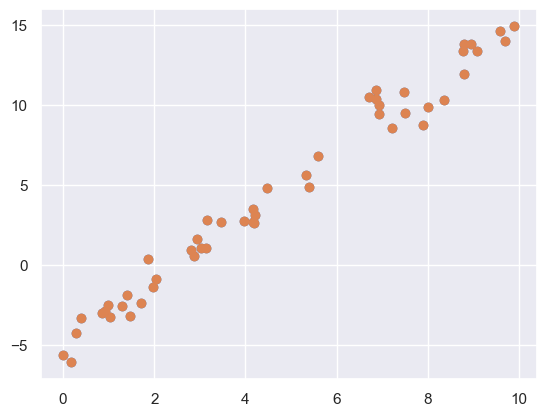

In [ ]:
rng = np.random.RandomState(1)
x=10*rng.rand(50) #50 in range 0 to 10
y=2*x-5+rng.randn(50)
plt.scatter(x,y)
plt.show()

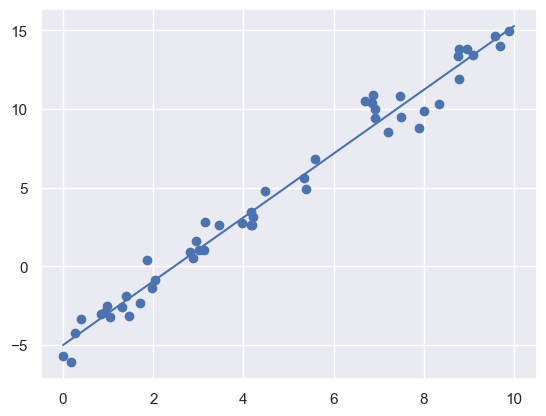

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [6]:
print("model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)

model slope:  2.0272088103606944
model intercept:  -4.9985770855532


In [8]:
rng = np.random.RandomState(1)
X = 10*rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000049
[ 1.5 -2.   1. ]


In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [11]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

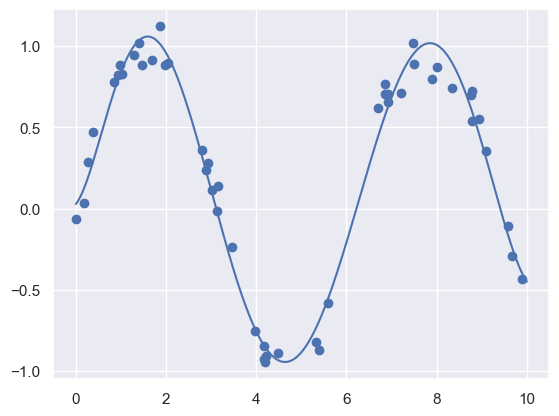

In [13]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x)+0.1*rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

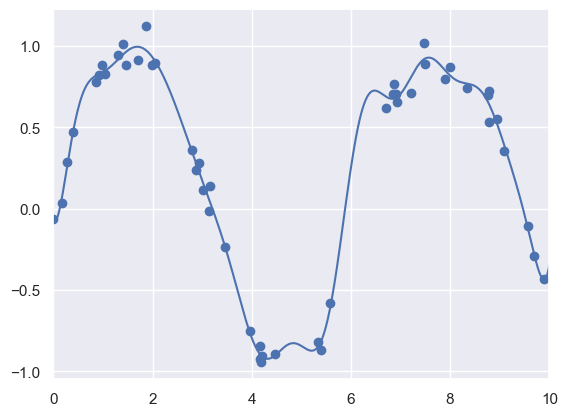

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5*np.sum(arg**2, axis))
    
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0,10);
plt.show()

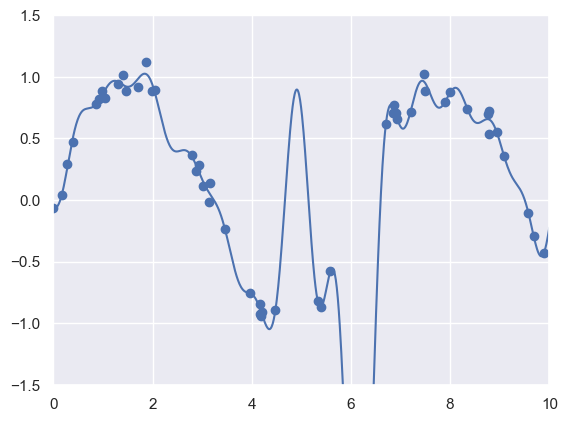

In [17]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);
plt.show()

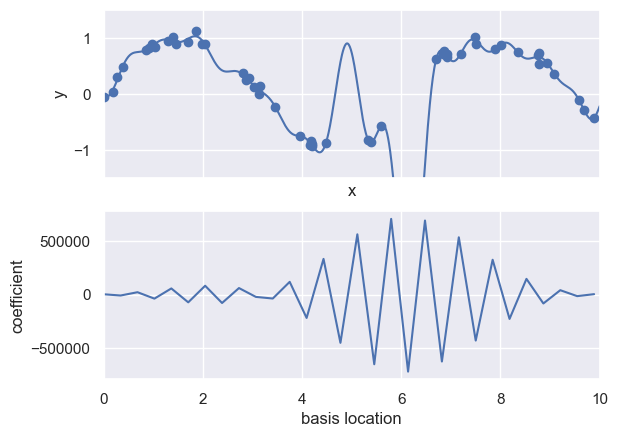

In [18]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0,10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)
plt.show()

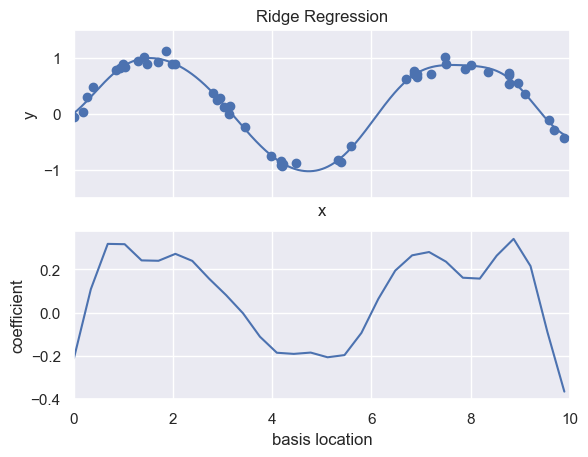

In [19]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


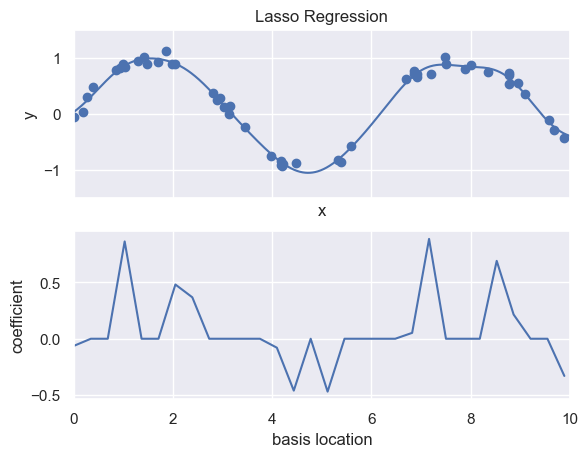

In [21]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')
plt.show()

### Linear Regression Example : Covid 2021

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_excel("dataset/covid2021.xlsx")
df.head()

,Date,Suspect
0,2021-06-24,157
1,2021-06-25,163
2,2021-06-26,139
3,2021-06-27,89
4,2021-06-28,145


In [24]:
df.isnull().sum()

Date       0
Suspect    0
dtype: int64

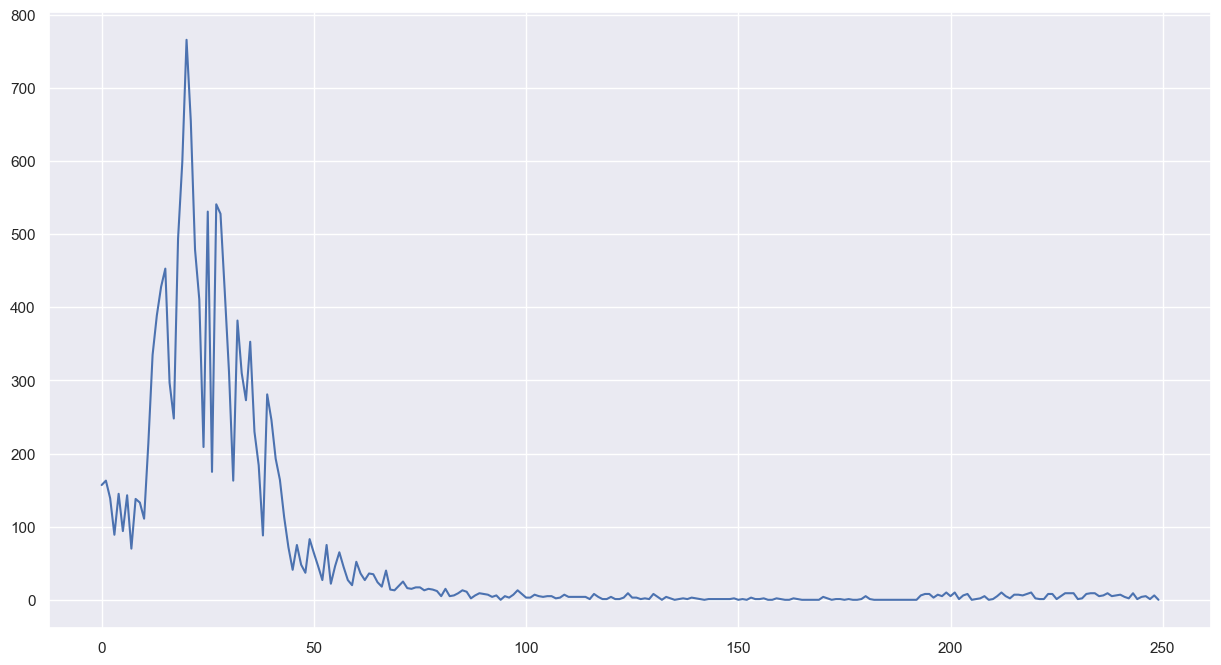

In [25]:
plt.figure(figsize=(15,8))
plt.plot(df['Suspect'])
plt.show()

In [30]:
df['Date'] = df.index

In [33]:
df['Date'] = df[('Date')].values.astype("float64")

In [34]:
column = ['Date', 'Suspect']
x = df[column]
y = df['Suspect']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [37]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
df['Prediction'] = model.predict(x)

<Figure size 1500x800 with 0 Axes>

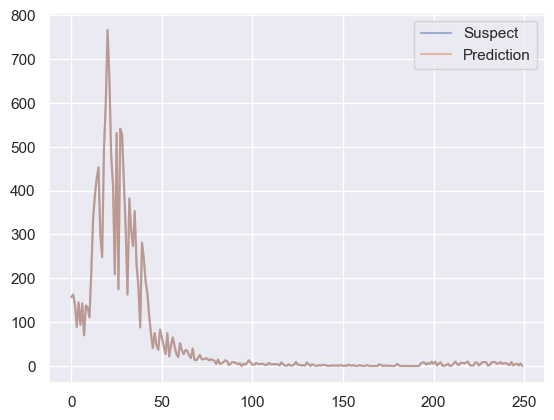

<Figure size 1500x800 with 0 Axes>

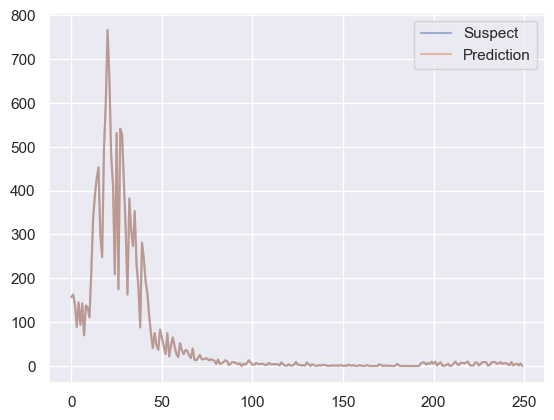

In [39]:
plt.figure(figsize=(15, 8))
df[['Suspect', 'Prediction']].plot(alpha=0.5)
plt.show()

In [42]:
params = pd.Series(model.coef_, index = x.columns)
params

Date       8.947595e-17
Suspect    1.000000e+00
dtype: float64

In [43]:
print("model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)

model slope:  8.94759538851259e-17
model intercept:  0.0


In [44]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.0001


In [45]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error', verbose=1)

,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,1.0


In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010648,0.002610,0.004204,0.000377,0.0001,{'alpha': 0.0001},-3.992366e-09,-5.723704e-09,-3.158446e-09,-2.977521e-09,...,-4.081068e-09,9.998172e-10,1,-3.767997e-09,-4.440221e-09,-3.767446e-09,-3.717636e-09,-4.028533e-09,-3.944367e-09,2.708393e-10
1,0.010026,0.002058,0.003925,0.001253,0.0010,{'alpha': 0.001},-3.992404e-08,-5.723684e-08,-3.158470e-08,-2.977526e-08,...,-4.081079e-08,9.998053e-09,2,-3.768027e-08,-4.440202e-08,-3.767475e-08,-3.717639e-08,-4.028542e-08,-3.944377e-08,2.708247e-09
2,0.004841,0.002563,0.005189,0.002451,0.0100,{'alpha': 0.01},-3.992403e-07,-5.723679e-07,-3.158470e-07,-2.977527e-07,...,-4.081078e-07,9.998033e-08,3,-3.768026e-07,-4.440198e-07,-3.767475e-07,-3.717641e-07,-4.028539e-07,-3.944376e-07,2.708230e-08
3,0.005724,0.001574,0.004673,0.002091,0.0500,{'alpha': 0.05},-1.996202e-06,-2.861839e-06,-1.579235e-06,-1.488764e-06,...,-2.040539e-06,4.999016e-07,4,-1.884013e-06,-2.220099e-06,-1.883737e-06,-1.858820e-06,-2.014270e-06,-1.972188e-06,1.354114e-07
4,0.005632,0.001922,0.003796,0.001618,0.1000,{'alpha': 0.1},-3.992403e-06,-5.723678e-06,-3.158470e-06,-2.977528e-06,...,-4.081077e-06,9.998030e-07,5,-3.768025e-06,-4.440197e-06,-3.767475e-06,-3.717641e-06,-4.028539e-06,-3.944375e-06,2.708228e-07


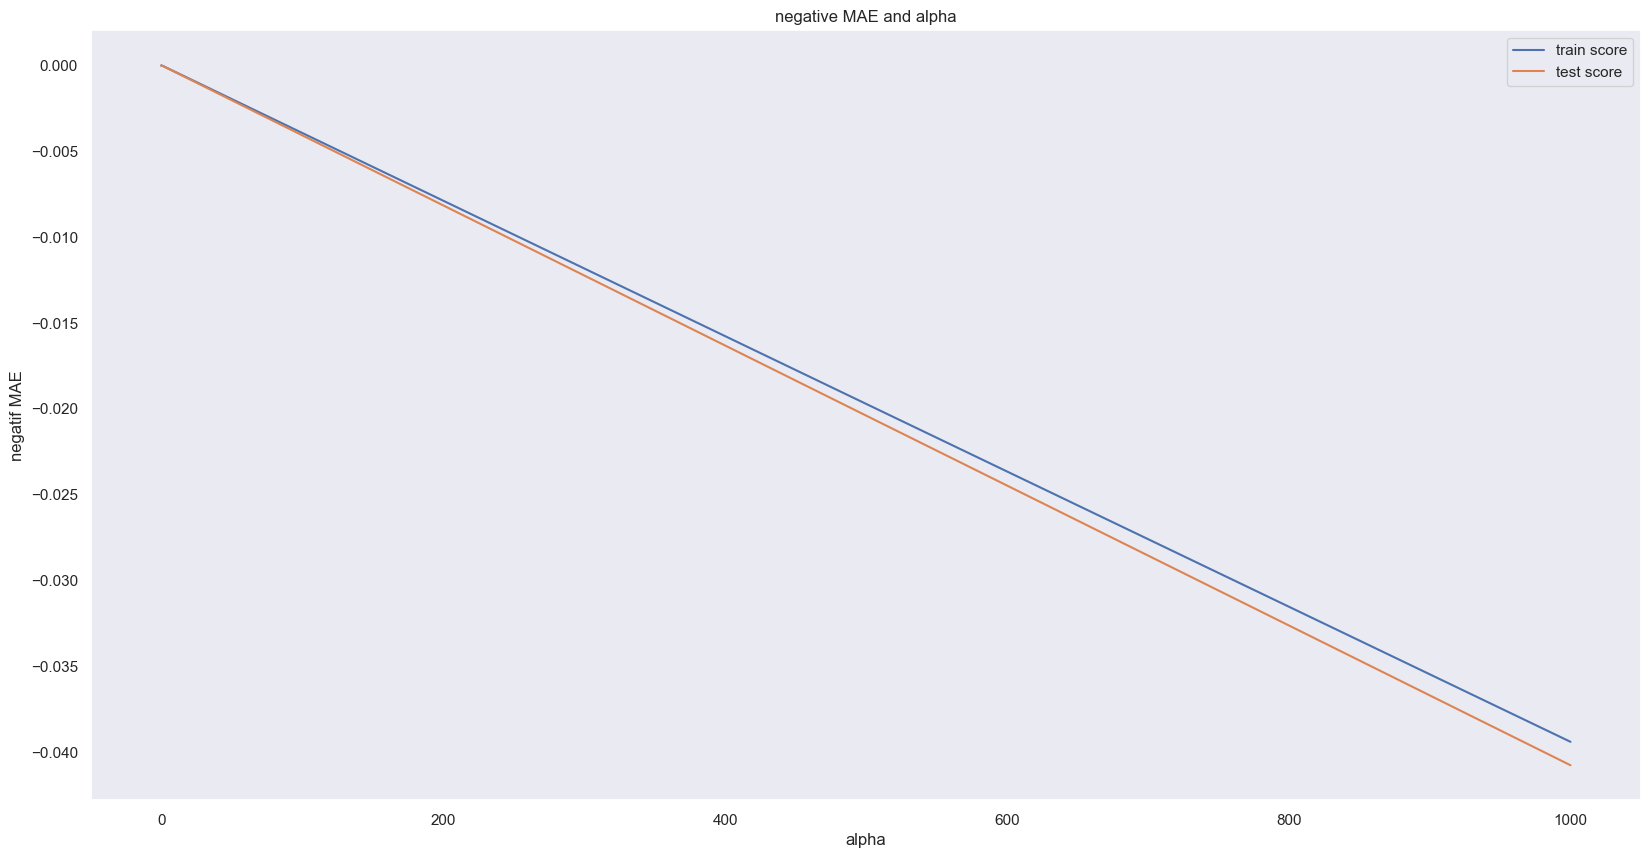

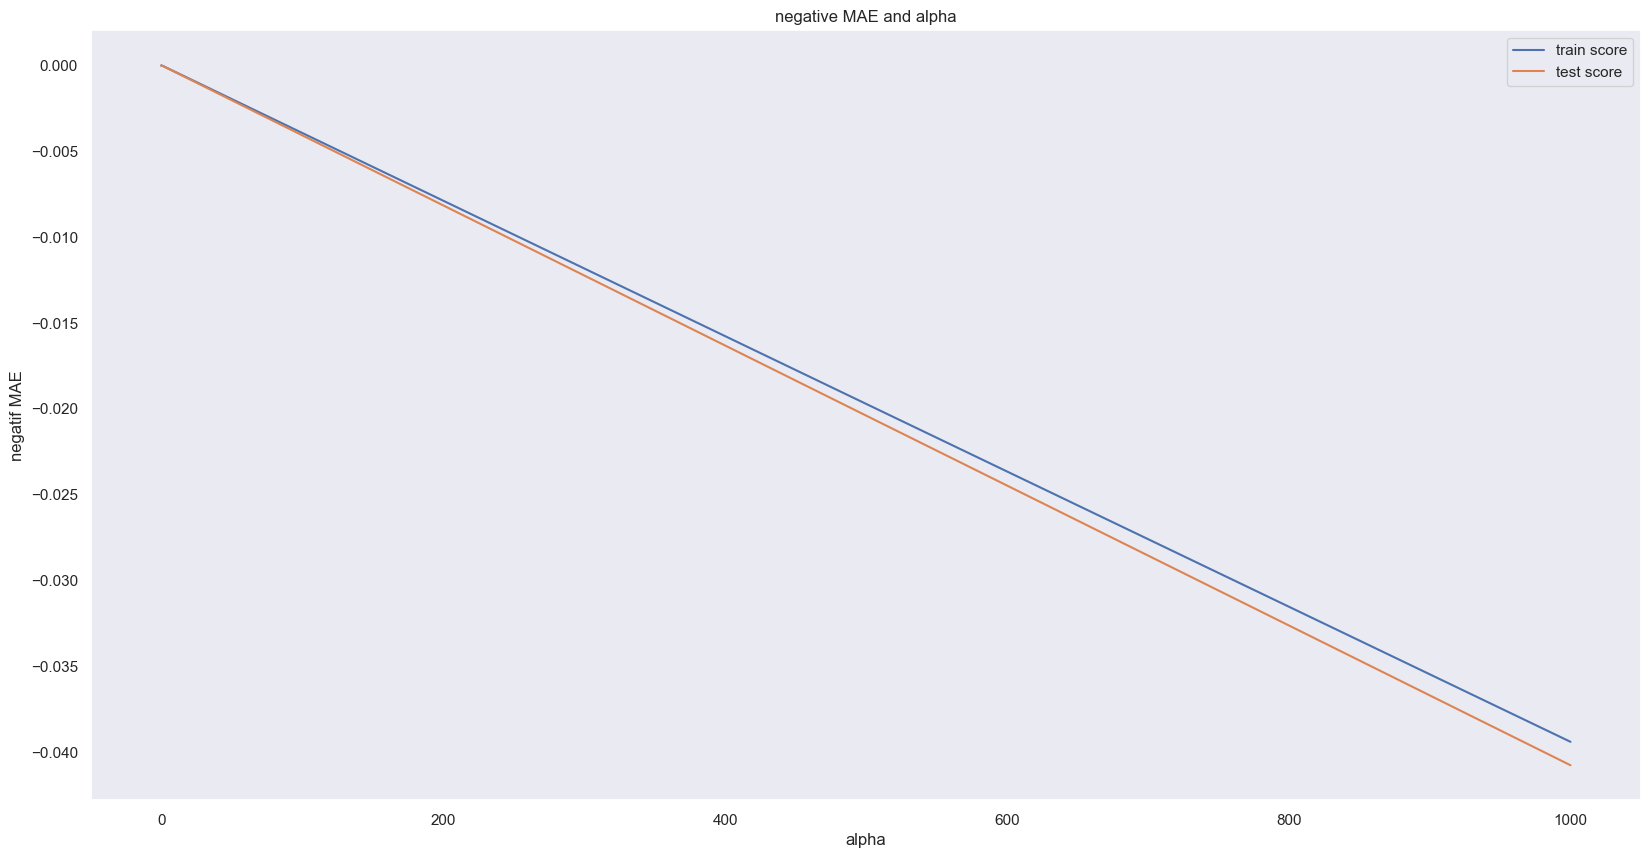

In [48]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('negatif MAE')
plt.title('negative MAE and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [49]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]

<Figure size 2000x1000 with 0 Axes>

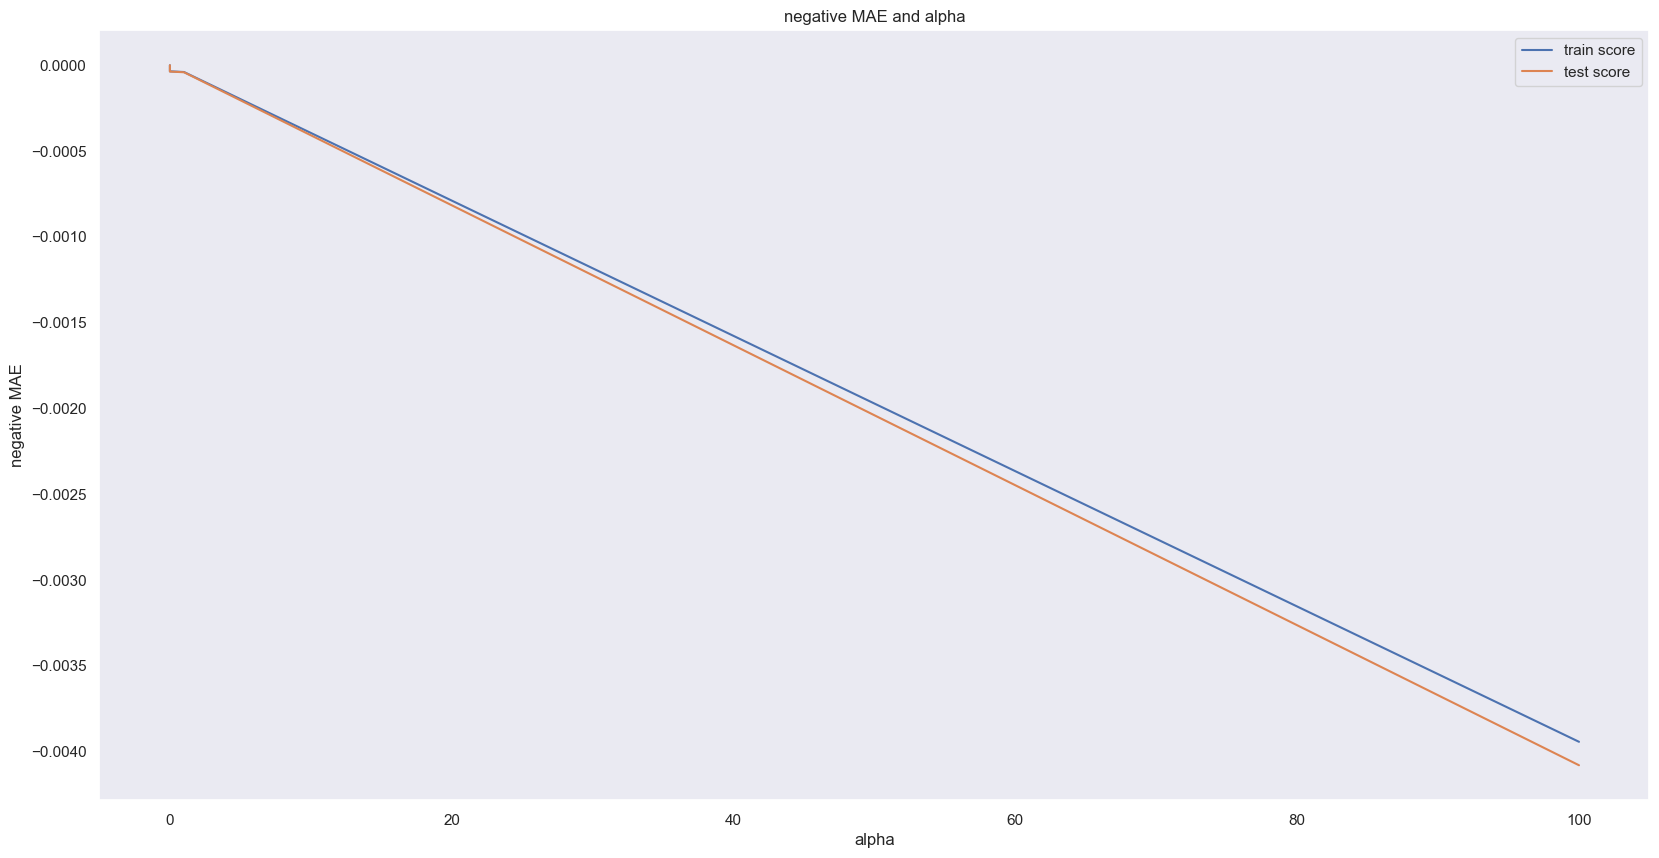

In [50]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('negative MAE')
plt.title('negative MAE and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [51]:
alpha = 15
ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
ridge.coef_

array([-6.64007020e-06,  9.99993941e-01])

In [52]:
imp_ridge = pd.DataFrame({
    "varname" : x.columns,
    "coefficient" : ridge.coef_
    })
imp_ridge.sort_values(by = "coefficient", ascending=False)

,varname,coefficient
1,Suspect,0.999994
0,Date,-0.000007


In [53]:
y_pred = ridge.predict(x_test)

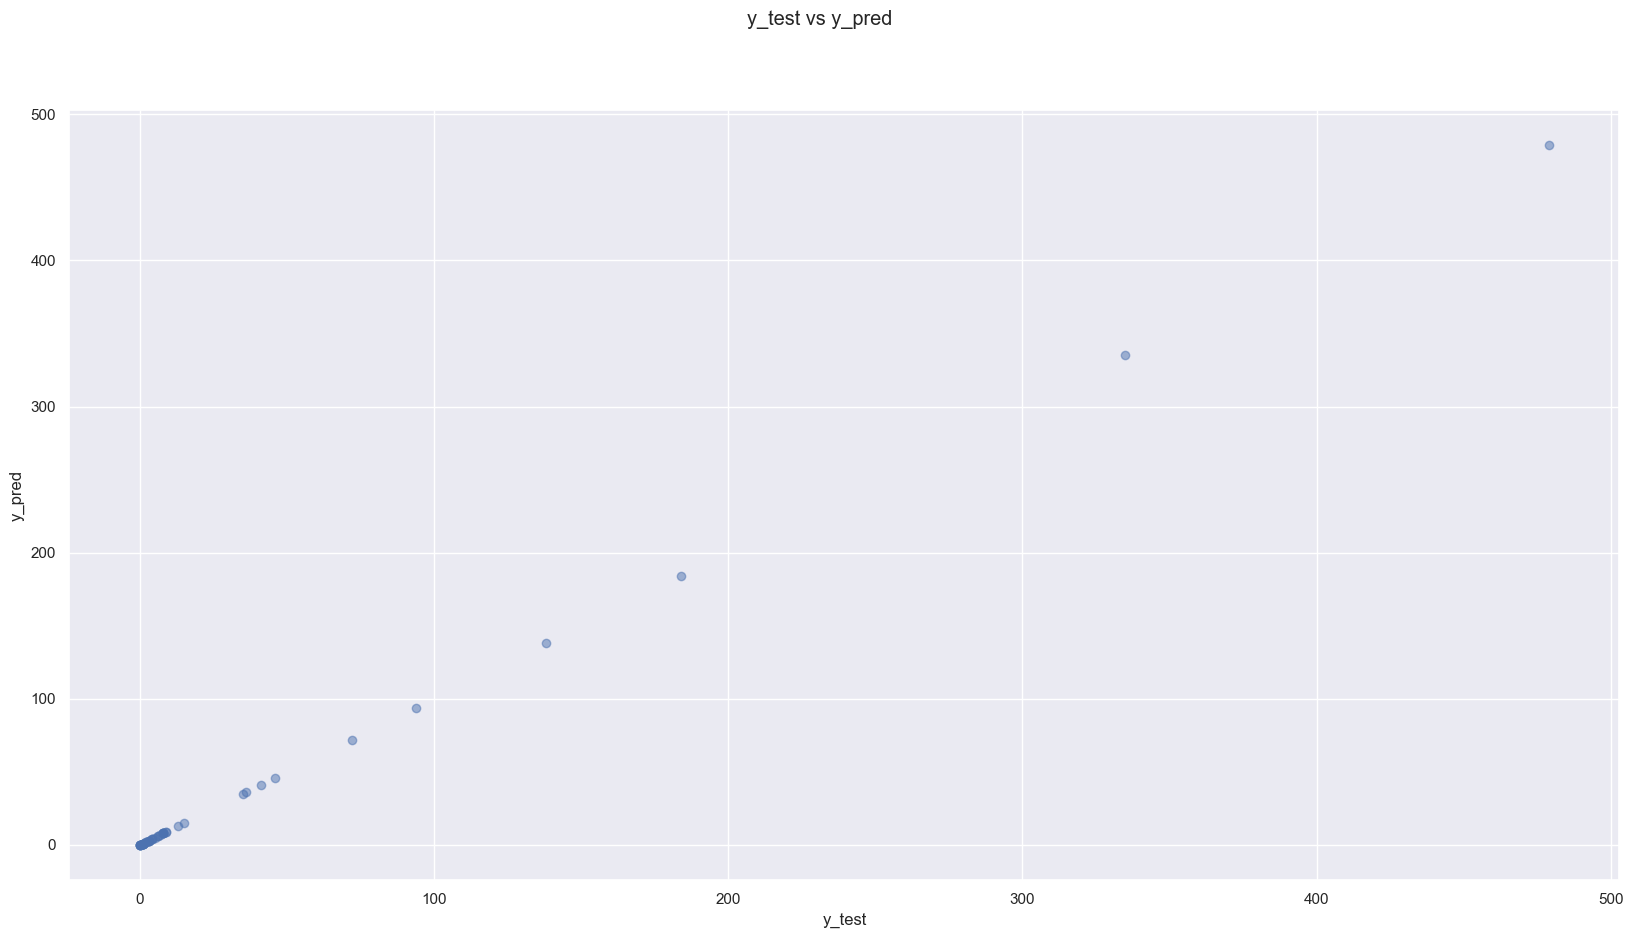

In [55]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha= .5)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [57]:
df = pd.DataFrame({'Actual' : y_test, 'Predictions' : y_pred})
df['Predictions'] = round(df['Predictions'], 2)
df

,Actual,Predictions
225,1,1.0
122,1,1.0
92,4,4.0
157,0,0.0
154,1,1.0
161,0,0.0
198,5,5.0
83,6,6.0
63,36,36.0
155,1,1.0


In [62]:
metrics.explained_variance_score(y_test, y_pred)

0.9999999999730012

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

0.0003913572935409164

In [63]:
metrics.max_error(y_test, y_pred)

0.0018246407334459036

In [64]:
metrics.mean_squared_error(y_test, y_pred)

2.376950007450478e-07

In [65]:
metrics.r2_score(y_test, y_pred)

0.9999999999673318

In [66]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]
lasso_gscv = GridSearchCV(estimator= Lasso(),
                          param_grid= {'alpha': alpha,
                                       'max_iter': max_iter},
                          scoring = 'neg_mean_absolute_error',
                          cv = 5, refit = False)

In [67]:
lasso_gscv.fit(x, y)
lasso_gscv.best_params_

{'alpha': 0.0001, 'max_iter': 100}

In [70]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'],
              max_iter=  lasso_gscv.best_params_['max_iter'])
lasso.fit(x_train, y_train)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [71]:
print("train set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(x_test, y_test)))

train set score: 1.00
test set score: 1.00


### Multiple Linear Regression

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0,1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [73]:
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [74]:
print(y)

[ 4  5 20 14 32 22 38 43]


In [75]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coef: ', r_sq)
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

coef:  0.8615939258756775
intercept:  5.52257927519819
slope:  [0.44706965 0.25502548]


In [76]:
y_pred = model.predict(x)
print('predicted resp: ', y_pred, sep = '\n')

predicted resp: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [77]:
X_new = np.arange(10).reshape((-1, 2))
print(X_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [78]:
y_new = model.predict(X_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Advanced Linear Regression with Statsmodels

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [91]:
data = pd.read_csv("Dataset/bank.csv", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [94]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [95]:
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

In [96]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [97]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

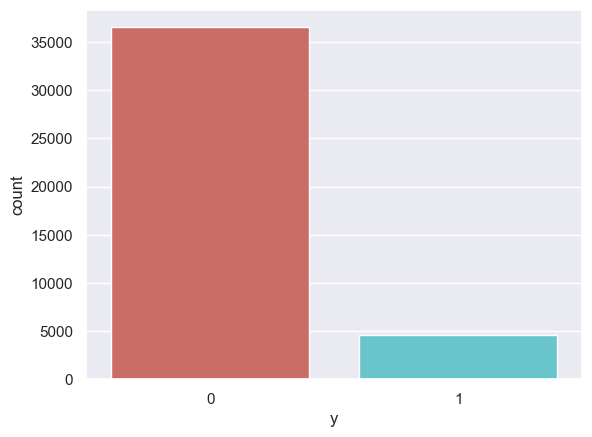

In [98]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [99]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subs: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subs: ", pct_of_sub*100)

percentage of no subs:  88.73458288821988
percentage of subs:  11.265417111780131


<Figure size 640x480 with 0 Axes>

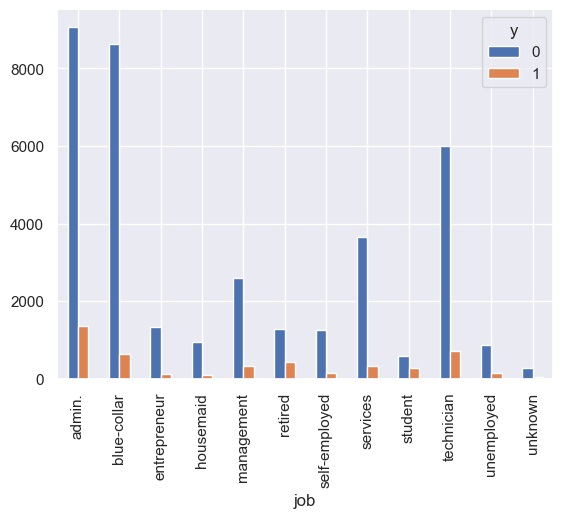

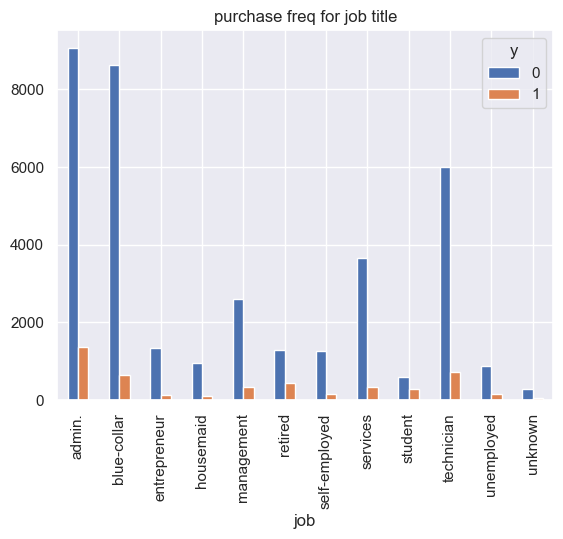

In [104]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('purchase freq for job title')
plt.xlabel('job')
plt.savefig('purchase_fre_job')
plt.show()

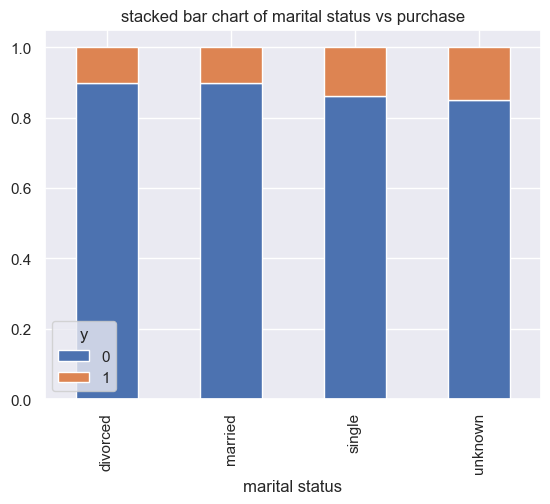

In [106]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('stacked bar chart of marital status vs purchase')
plt.xlabel('marital status')
plt.savefig('marital_vs_pur_stack')
plt.show()

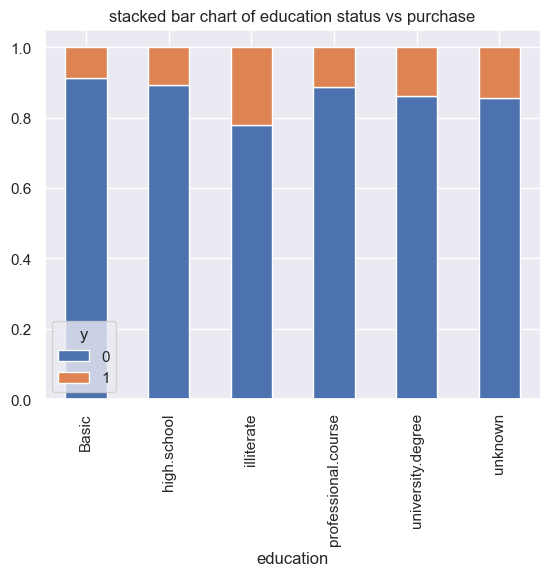

In [108]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('stacked bar chart of education status vs purchase')
plt.xlabel('education')
plt.savefig('education_vs_pur_stack')
plt.show()

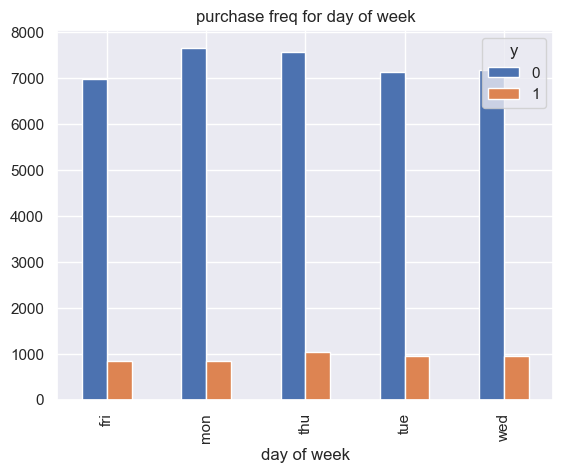

In [109]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('purchase freq for day of week')
plt.xlabel('day of week')
plt.savefig('pur_dayofweek_bar')
plt.show()

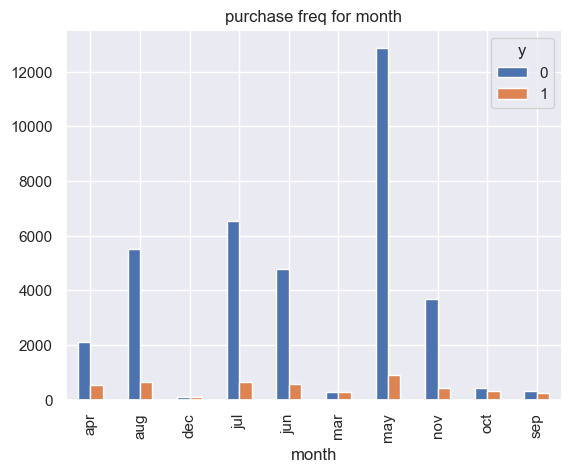

In [110]:
pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('purchase freq for month')
plt.xlabel('month')
plt.savefig('pur_fre_month_bar')
plt.show()

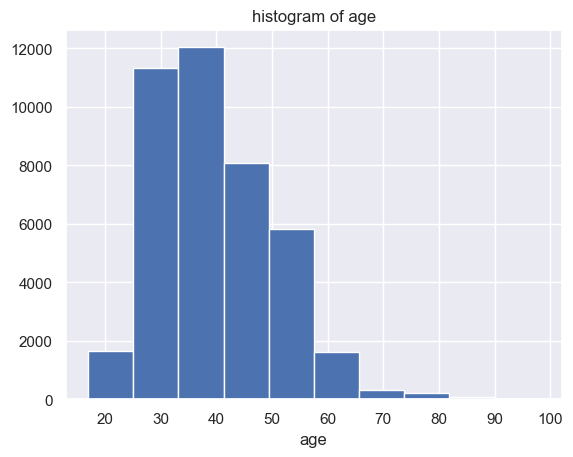

In [111]:
data.age.hist()
plt.title('histogram of age')
plt.xlabel('age')
plt.savefig('hist_age')
plt.show()

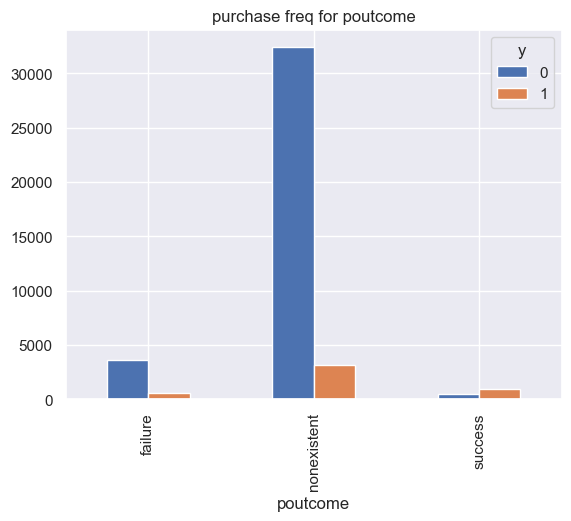

In [112]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.title('purchase freq for poutcome')
plt.xlabel('poutcome')
plt.savefig('pur_fre_pout_bar')
plt.show()

In [113]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data=data1
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [114]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [115]:
x = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [134]:
import statsmodels.api as sm
logit_model = sm.logit(y, x)
result = logit_model.fit()
print(result.summary2())

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (d:\Anaconda\Lib\site-packages\scipy\_lib\_util.py)

In [2]:
import scipy, statsmodels
print("scipy:", scipy.__version__)
print("statsmodels:", statsmodels.__version__)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "d:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "d:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [135]:
import sys
print(sys.executable)

d:\Anaconda\python.exe


In [137]:
!pip install scipy


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.6 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.6 MB 3.8 MB/s eta 0:00:10
   -- ------------------------------------- 2.1/38.6 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/38.6 MB 3.1 MB/s eta 0:00:12
   --- ------------------------------------ 3.1/38.6 MB 2.9 MB/s eta 0:00:13
   --- ------------------------------------ 3.7/38.6 MB 2.8 MB/s eta 0:00:13
   ---- ----------------------------------- 4.2/38.6 MB 2.7 MB/s eta 0:00:13
   ---- ----------------------------------- 4.7/38.6 MB 2.7 MB/s eta 0:00:13
   ----- ---------------------------------- 5.2/38.6 MB 2.7 MB/s eta 0:00:13
   ----- ---------------------------------- 5.8/38.6 MB 2.7 MB/s eta 0:00:13
   ------ --------------------------------- 6.3/38.6 MB 2.6 MB/s eta 0:00:13
   ------- -------------------------------- 6.8/38.6 MB 2.6 MB/s eta 0:00:13
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.


In [1]:
import scipy
print(scipy.__version__)


1.11.4


d:\Anaconda\Lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.3.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
